### Required packages

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import cv2

### Load and review the Data

In [69]:
data_dir = "E:\Imarticus/NalaiyaThiran/flowers"

In [70]:
# classes in the data

In [71]:
Name=[]
for file in os.listdir(data_dir):
    Name+=[file]
print(Name)
print(len(Name))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
5


In [72]:
#sample from data

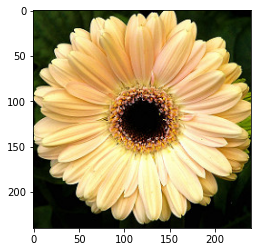

In [73]:
import matplotlib.pyplot as plt
img = cv2.imread(r"E:\Imarticus\NalaiyaThiran/flowers/daisy/107592979_aaa9cdfe78_m.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

### Image Agumentation

In [128]:
img_data_generator = {
    "train_set": ImageDataGenerator(horizontal_flip=True,
                                    vertical_flip=True,
                                    rescale=1./255,
                                    zoom_range=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rotation_range=45,
                                    validation_split=0.2)
    .flow_from_directory(directory=data_dir,
                         target_size=(300, 300),
                         subset="training"),
    "valid_set": ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2)
    .flow_from_directory(directory=data_dir,
                         target_size=(300, 300),
                         subset="validation")
}

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


### Model

In [103]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [111]:
inception = InceptionV3(weights="imagenet",
                        include_top=False,
                        input_shape=(300, 300, 3))

inception.trainable = False


In [130]:
##additional layers

In [112]:
model = Sequential([
    inception,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dense(5, activation='softmax')
])

### Model Compiling

In [116]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_7 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 23,906,085
Trainable params: 2,103,301
Non-trainable params: 21,802,784
__________________________________

In [117]:
batch_size = 32
epochs = 10

train_data_generator = img_data_generator["train_set"]
valid_data_generator = img_data_generator["valid_set"]

In [118]:
steps_per_epoch = train_data_generator.n // batch_size
validation_steps = valid_data_generator.n // batch_size

### Model Fitting

In [119]:

history = model.fit(train_data_generator,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=valid_data_generator,
                    validation_steps=validation_steps,)

Epoch 1/10
108/108 [==============================] - 290s 3s/step - loss: 0.8129 - accuracy: 0.7200 - val_loss: 0.4684 - val_accuracy: 0.8197
Epoch 2/10
108/108 [==============================] - 271s 3s/step - loss: 0.5484 - accuracy: 0.8026 - val_loss: 0.3784 - val_accuracy: 0.8630
Epoch 3/10
108/108 [==============================] - 286s 3s/step - loss: 0.4528 - accuracy: 0.8283 - val_loss: 0.3861 - val_accuracy: 0.8594
Epoch 4/10
108/108 [==============================] - 255s 2s/step - loss: 0.4124 - accuracy: 0.8546 - val_loss: 0.3750 - val_accuracy: 0.8726
Epoch 5/10
108/108 [==============================] - 258s 2s/step - loss: 0.4058 - accuracy: 0.8491 - val_loss: 0.3552 - val_accuracy: 0.8666
Epoch 6/10
108/108 [==============================] - 261s 2s/step - loss: 0.3922 - accuracy: 0.8566 - val_loss: 0.3518 - val_accuracy: 0.8798
Epoch 7/10
108/108 [==============================] - 259s 2s/step - loss: 0.3775 - accuracy: 0.8622 - val_loss: 0.3324 - val_accuracy: 0.8810

### Model Save

In [121]:
model.save("flower_classification.h5")

In [123]:
best_model = keras.models.load_model("flower_classification.h5")

def predict(img_rel_path):
    img = image.load_img(img_rel_path, target_size=(300, 300))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0
    
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()
    
    pred = best_model.predict(img[np.newaxis, ...])
    
    labels = {0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}

    predicted_class = labels[np.argmax(pred[0], axis=-1)]
    print(predicted_class)
    print(np.max(pred[0], axis=-1))

### Model Testing

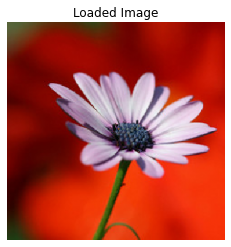

daisy
0.99956506


In [126]:
predict("E:\Imarticus/NalaiyaThiran/flowers/daisy/3957488431_52a447c0e8_m.jpg")